In [1]:
import matplotlib.pyplot as plt  # plotting library
import numpy as np  # numerical library
import xarray as xr  # netCDF library
import cartopy  # Map projections libary
import cartopy.crs as ccrs  # Projections list
import cftime
import pandas as pd

In [2]:
# Some defaults:
plt.rcParams['figure.figsize'] = (12, 5)  # Default plot size

In [3]:
#To compute de climatoloy
yearC1='2004'
yearC2='2014'

# Read data

In [4]:
RG_temp      = xr.open_dataset('./Data/RG_temp_global_2000dbar.nc')
RG_temp_anom = xr.open_dataset('./Data/RG_temp_anom_global_2000dbar.nc')

In [5]:
EN422g10_temp      = xr.open_dataset('./Data/EN422g10_temp_global_2000m.nc')
EN422g10_temp_anom = xr.open_dataset('./Data/EN422g10_temp_anom_global_2000m.nc')

In [12]:
EN422l09_temp      = xr.open_dataset('./Data/EN422g10_temp_global_2000m.nc')
EN422l09_temp_anom = xr.open_dataset('./Data/EN422g10_temp_anom_global_2000m.nc')

In [13]:
ISAS20_temp      = xr.open_dataset('./Data/ISAS20_temp_global_2000m.nc')
ISAS20_temp_anom = xr.open_dataset('./Data/ISAS20_temp_anom_global_2000m.nc')

In [14]:
RG_temp

<xarray.Dataset> Size: 3kB
Dimensions:      (time: 240)
Coordinates:
  * time         (time) datetime64[ns] 2kB 2004-01-15 2004-02-15 ... 2023-12-15
Data variables:
    temperature  (time) float32 960B 10.25 10.25 10.29 ... 10.32 10.33 10.35

In [15]:
offSetEN422g10 = RG_temp.temperature.sel(time=slice('2004-01-01', '2014-12-31')).mean()-EN422g10_temp.temperature.sel(time=slice('2004-01-01', '2014-12-31')).mean()

offSetEN422l09 = RG_temp.temperature.sel(time=slice('2004-01-01', '2014-12-31')).mean()- EN422g10_temp.temperature.sel(time=slice('2004-01-01', '2014-12-31')).mean()

offSetISAS20  = RG_temp.temperature.sel(time=slice('2004-01-01', '2014-12-31')).mean()- ISAS20_temp.temperature.sel(time=slice('2004-01-01', '2014-12-31')).mean()


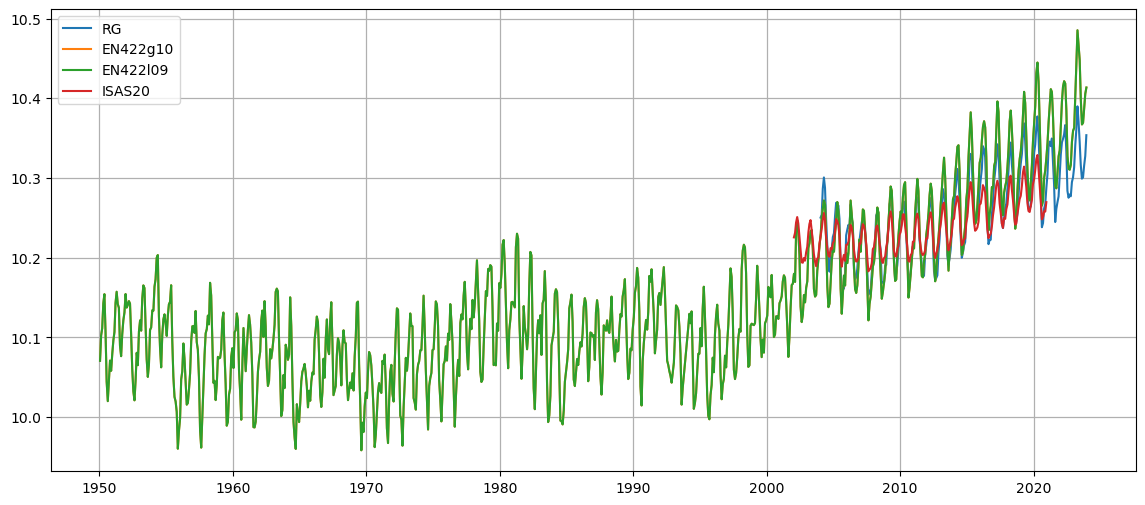

In [16]:
ig, ax = plt.subplots(figsize = (14,6))
ax.plot(RG_temp.time       ,RG_temp.temperature                      , label='RG')
ax.plot(EN422g10_temp.time ,EN422g10_temp.temperature+offSetEN422g10 , label='EN422g10')
ax.plot(EN422l09_temp.time ,EN422l09_temp.temperature+offSetEN422l09 , label='EN422l09')
ax.plot(ISAS20_temp.time   ,ISAS20_temp.temperature+offSetISAS20     , label='ISAS20')

ax.grid(linestyle='-', linewidth=.9)
ax.legend()

In [14]:
offSetEN422g10 = RG_temp_anom.temperature.sel(time=slice('2004-01-01', '2014-12-31')).mean()- EN422g10_temp_anom.temperature.sel(time=slice('2004-01-01', '2014-12-31')).mean()

offSetEN422l09 = RG_temp_anom.temperature.sel(time=slice('2004-01-01', '2014-12-31')).mean()- EN422g10_temp_anom.temperature.sel(time=slice('2004-01-01', '2014-12-31')).mean()

offSetISAS20  = RG_temp_anom.temperature.sel(time=slice('2004-01-01', '2014-12-31')).mean()- ISAS20_temp_anom.temperature.sel(time=slice('2004-01-01', '2014-12-31')).mean()


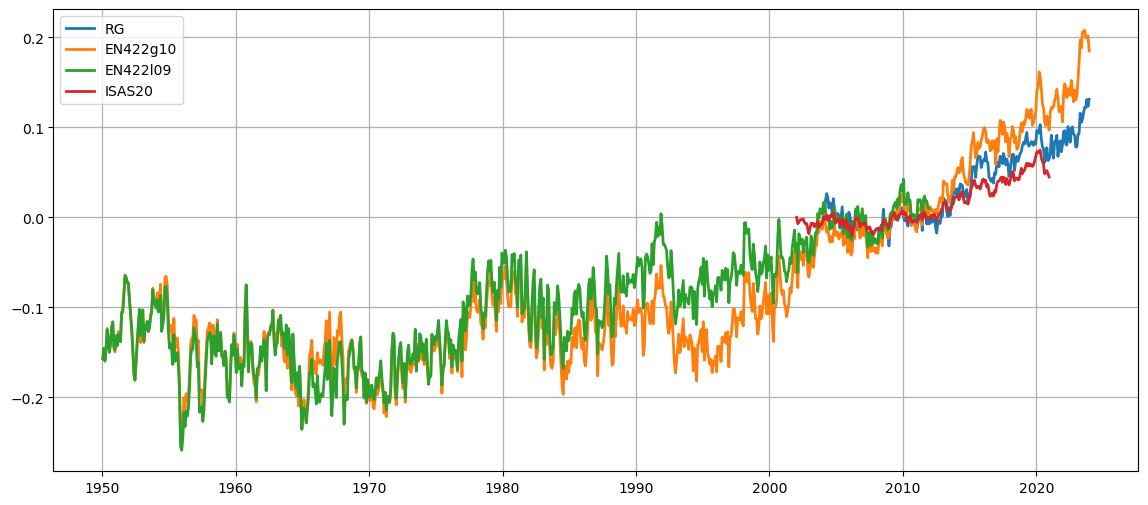

In [16]:
ig, ax = plt.subplots(figsize = (14,6))
ax.plot(RG_temp_anom.time       ,RG_temp_anom.temperature      , label='RG' ,linewidth=2.0)
ax.plot(EN422g10_temp_anom.time ,EN422g10_temp_anom.temperature, label='EN422g10',linewidth=2.0)
ax.plot(EN422l09_temp_anom.time ,EN422l09_temp_anom.temperature, label='EN422l09',linewidth=2.0)
ax.plot(ISAS20_temp_anom.time   ,ISAS20_temp_anom.temperature  , label='ISAS20',linewidth=2.0)
ax.grid(linestyle='-', linewidth=.9)
ax.legend()